In [1]:
import os
os.chdir('C:/temp')
# 载入此项目所需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 载入数据集
data = pd.read_csv('uni.csv')

In [3]:
#展示前十个数据，解释变量含义
data.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [4]:
#数据集的大小
data.shape

(400, 8)

In [5]:
#查看数据集是否有缺失值
print(data.isnull().sum())
#可以看出该数据集没有缺失值

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [6]:
#查看每个数据特征的数据类型
print(data.dtypes)

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object


In [7]:
#查看数据集的描述性统计值
data.describe(include='all')
#例如TOEFL分数：在400个申请者中，最低TOEFL分数是92分，最高则是120分，平均TOEFL分数是107.41分。

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
#相关性矩阵
corr = data[['Chance of Admit','GRE Score','TOEFL Score', 'CGPA','LOR','SOP','Research']].corr()
corr

,Chance of Admit,GRE Score,TOEFL Score,CGPA,LOR,SOP,Research
Chance of Admit,1.000000,0.802610,0.791594,0.873289,0.669889,0.675732,0.553202
GRE Score,0.802610,1.000000,0.835977,0.833060,0.557555,0.612831,0.580391
TOEFL Score,0.791594,0.835977,1.000000,0.828417,0.567721,0.657981,0.489858
CGPA,0.873289,0.833060,0.828417,1.000000,0.670211,0.718144,0.521654
LOR,0.669889,0.557555,0.567721,0.670211,1.000000,0.729593,0.396859
SOP,0.675732,0.612831,0.657981,0.718144,0.729593,1.000000,0.444029
Research,0.553202,0.580391,0.489858,0.521654,0.396859,0.444029,1.000000


In [9]:
#更改'Adimit'的数值类型，分组，方便后面画图：
def change_to_categorical(x):
    if x<=0.60:
      return 'low'
    elif x>=0.80:
      return 'high'
    else:
      return 'normal'
data['Admit'] = data.apply(lambda row: change_to_categorical(row['Chance of Admit']), axis=1)
data = data.drop(['Chance of Admit'],axis = 1)

(290, 340)

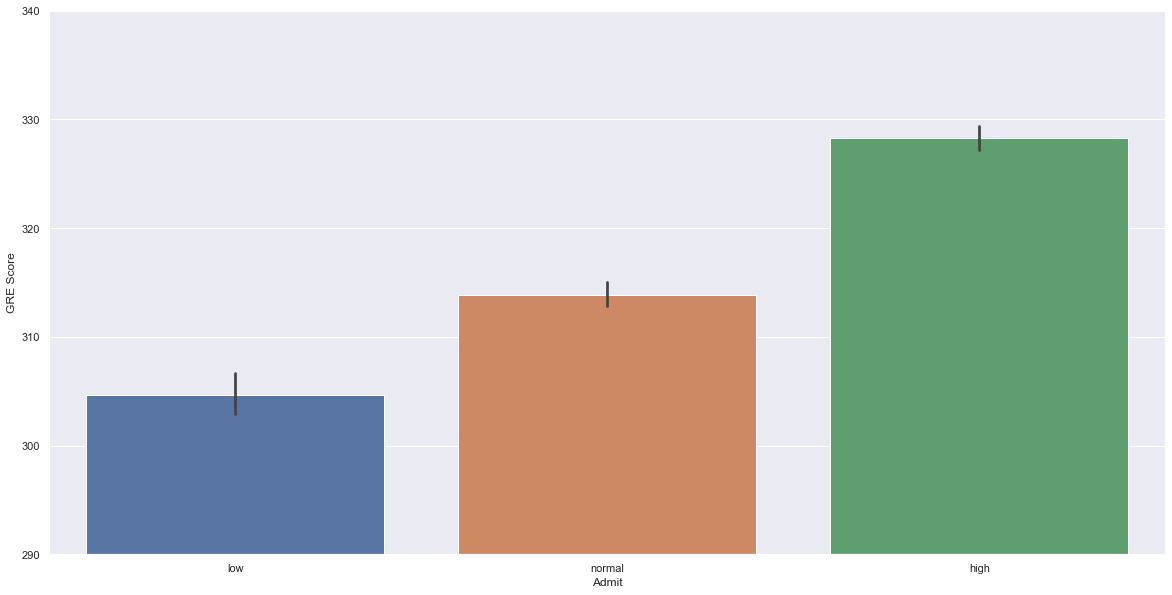

In [10]:
#了解GRE分数和申请几率的相关性
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x = 'Admit',y = 'GRE Score',  order = ['low','normal','high'],data = data)
plt.ylim(290, 340)

#可以看出基本上分数较低的录取概率也比较低，分数高的有较高概率录取，但是这不是绝对的，说明还有其他因素影响录取结果。

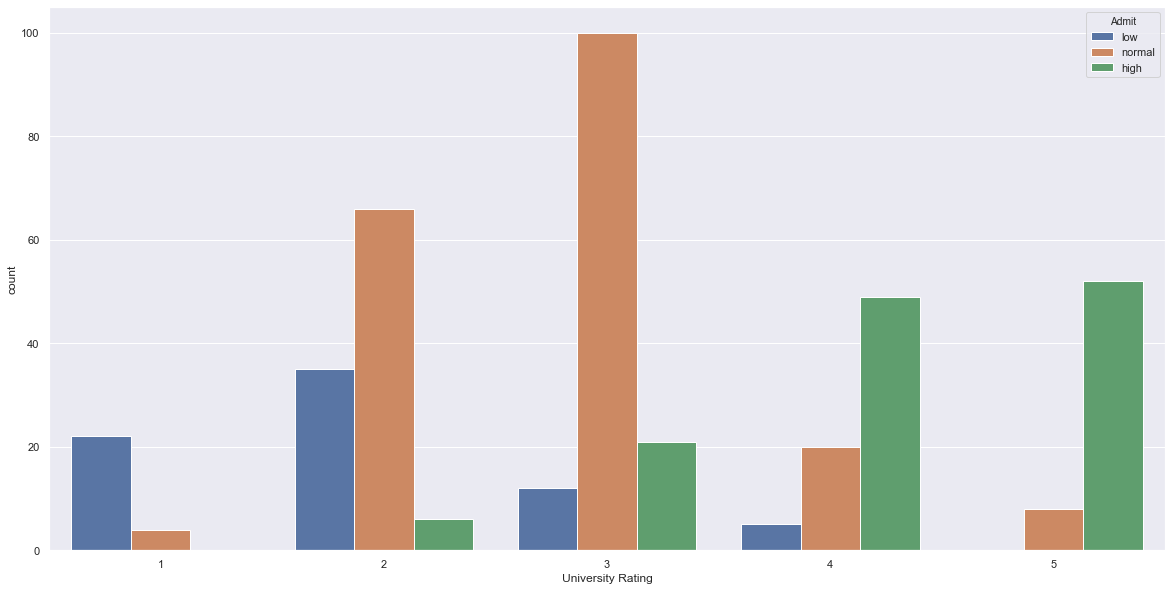

In [11]:
#查看大学的相对排名与录取几率的相关性
sns.set(rc = {'figure.figsize':(20,10)})
sns.countplot(x = 'University Rating', hue = 'Admit', hue_order = ['low','normal','high'], data = data)

#可以看出相对排名较前的大学本科毕业生反而被录取的几率会低， 所以本科毕业在哪所大学并没有决定性作用。

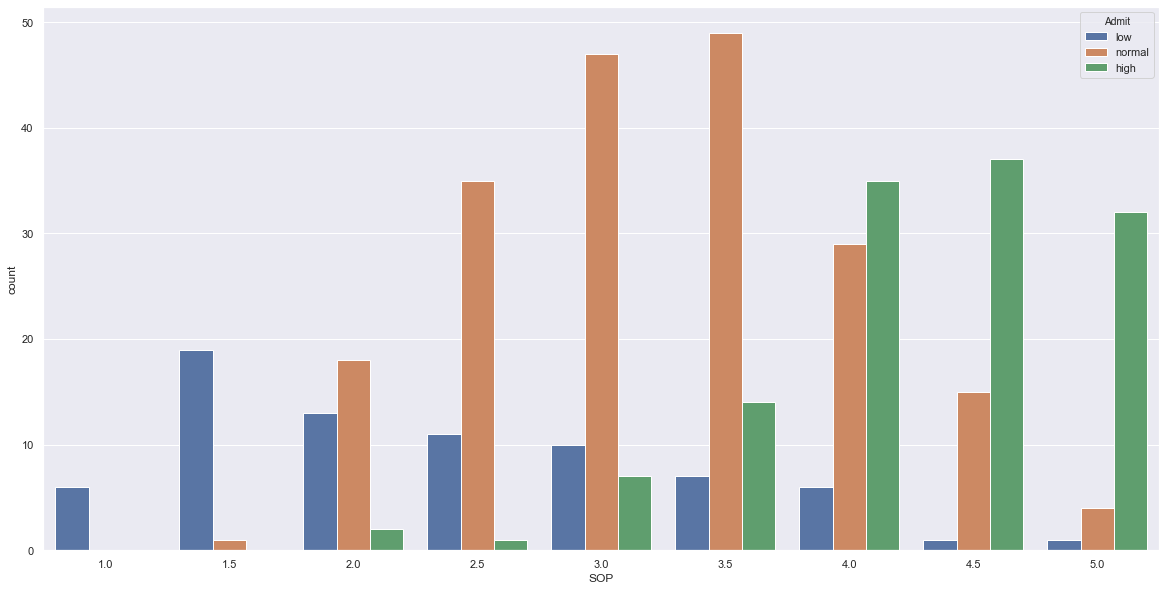

In [12]:
#分析一下，是否具有质量较高的申请信时录取几率会更高呢？

sns.set(rc = {'figure.figsize':(20, 10)})
sns.countplot(x ='SOP', hue = 'Admit', hue_order = ['low','normal','high'], data = data)

#由此看出，写出一份有质量的申请文书对于录取几率还有一定作用的

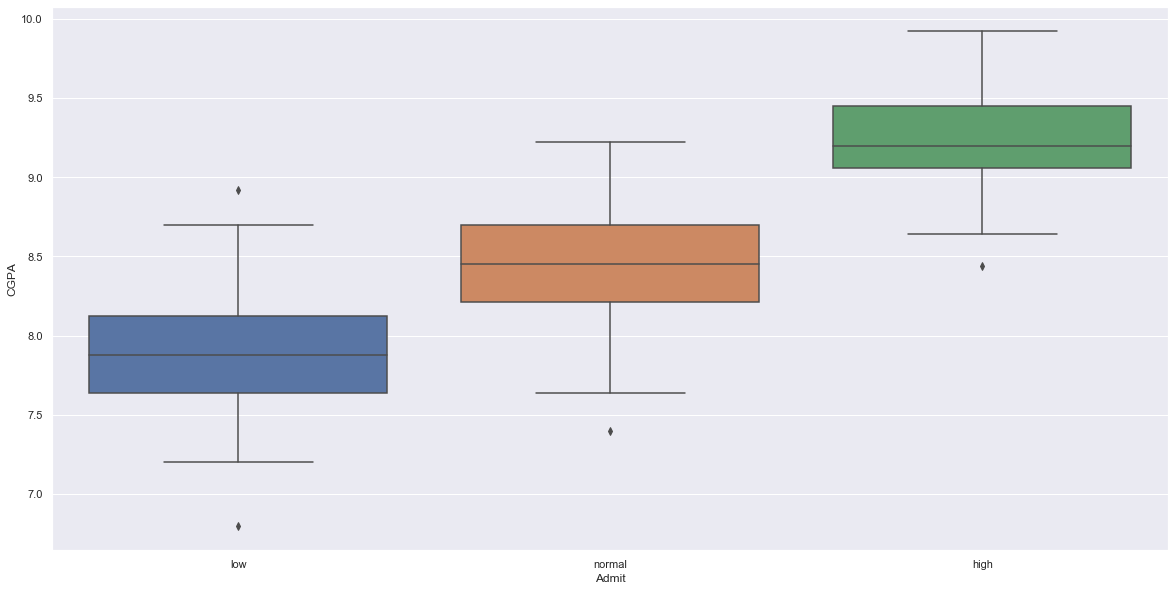

In [13]:
#CGPA与录取几率的关系

sns.set(rc = {'figure.figsize':(20,10)})
sns.boxplot(x = 'Admit', y = 'CGPA', data = data, order = ['low','normal','high'])

#毫无疑问，大学教授都青睐于本科期间学习成绩较好的同学。

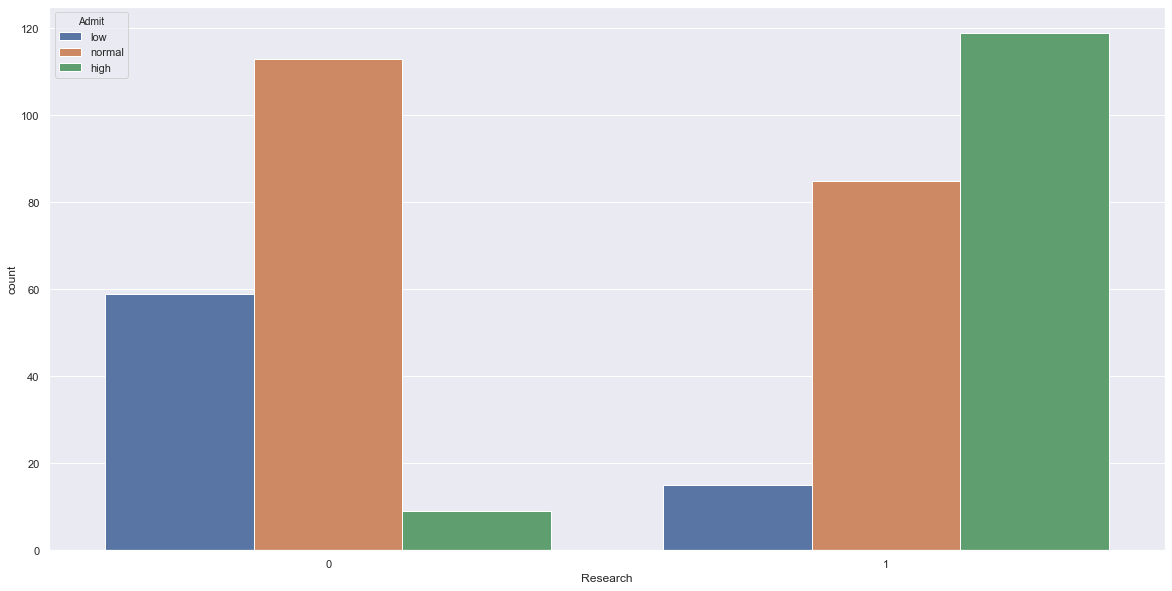

In [14]:
sns.set(rc = {'figure.figsize':(20, 10)})
sns.countplot(x ='Research', hue = 'Admit', hue_order = ['low','normal','high'], data = data)

In [15]:
#K近邻、随机森林

In [16]:
#导入数据，为了避免前面部分对admit的操作影响，我们再次导入原始数据
data = pd.read_csv('uni.csv')

In [17]:
rate = data['Chance of Admit']
features = data.drop('Chance of Admit', axis = 1)
#当axis=1时，数组的变化是横向的，而体现出来的是列的增加或者减少。
# 完成

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(features,rate,random_state=0)

In [19]:
from sklearn.neighbors import KNeighborsRegressor
reg=KNeighborsRegressor(n_neighbors=3)

In [20]:
#模型建立mse
from sklearn import metrics
def KN(X_train, X_test, features, rate):    #k近邻模型
    from sklearn.neighbors import KNeighborsRegressor             
    KN =KNeighborsRegressor()
    KN.fit(X_train, y_train)
    predicted = KN.predict(features)
    mse = metrics.mean_squared_error(rate,predicted)
    return (mse/10000)
print('KN mse: ',KN(X_train, X_test, features, rate))


KN mse:  4.6463099999999997e-07


In [21]:
def LR(X_train, X_test, features, rate):    #线性回归
    from sklearn.linear_model import LinearRegression            
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    predicted = LR.predict(features)
    mse = metrics.mean_squared_error(rate,predicted)
    return (mse/10000)
print('LR mse: ',LR(X_train, X_test, features, rate))

LR mse:  4.0031351641659167e-07


In [22]:

from sklearn import metrics
def RF(X_train, X_test, features, rate):    #随机森林 
    from sklearn.ensemble import RandomForestRegressor
    model= RandomForestRegressor()
    model.fit(X_train, y_train)
    predicted= model.predict(features)
    mse = metrics.mean_squared_error(rate,predicted)
    return (mse/10000)
print('RF mse: ',RF(X_train, X_test, features, rate))

RF mse:  2.0965100000000003e-07


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [23]:
def ENet(X_train, X_test, features, rate):    #弹性网络回归
    from sklearn.linear_model import ElasticNet              
    ENet=ElasticNet()
    ENet.fit(X_train, y_train)
    predicted = ENet.predict(features)
    mse = metrics.mean_squared_error(rate,predicted)
    return (mse/10000)
print('ENet mse: ',ENet(X_train, X_test, features, rate))

ENet mse:  8.790165110341517e-07


In [24]:
def ridge(X_train, X_test, features, rate):    #Ridge回归
    from sklearn.linear_model import Ridge               
    ridge =Ridge()
    ridge.fit(X_train, y_train)
    predicted = ridge.predict(features)
    mse = metrics.mean_squared_error(rate,predicted)
    return (mse/10000)
print('ridge mse: ',ridge(X_train, X_test, features, rate))

ridge mse:  3.9967268949237627e-07


In [25]:
def lasso(X_train, X_test, features, rate):    #lasso回归
    from sklearn.linear_model import Lasso              
    lasso =Lasso()
    lasso.fit(X_train, y_train)
    predicted = lasso.predict(X_test)
    mse = metrics.mean_squared_error(y_test,predicted)
    return (mse/10000)
print('lasso mse: ',lasso(X_train, X_test, y_train, y_test))

lasso mse:  1.253304945006239e-06


In [26]:
reg.fit(X_train,y_train)
reg.score(X_train,y_train)

0.8502719447259356

In [27]:
reg.score(X_test,y_test)

0.5664126838233539

In [28]:
best_method= ''; best_k=-1; best_score=0.0
for method in ['uniform','distance']:
    for k in range(1,100):
        knn=KNeighborsRegressor(n_neighbors=k,weights=method)
        knn.fit(X_train,y_train);t=knn.score(X_test,y_test)
        if t>best_score:
            best_score=t;best_k=k;best_method=method
    print(best_k,best_score,best_method)

10 0.6319582885181687 uniform
10 0.6319582885181687 uniform


In [29]:
#加权距离
from sklearn.neighbors import KNeighborsRegressor
reg=KNeighborsRegressor(n_neighbors=10,weights='distance')
#引入K紧邻模型的预测器，设定使用紧邻的权重
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='distance')

In [30]:
reg.score(X_train,y_train)

1.0

In [31]:
reg.score(X_test,y_test)

0.6246823067823235

24


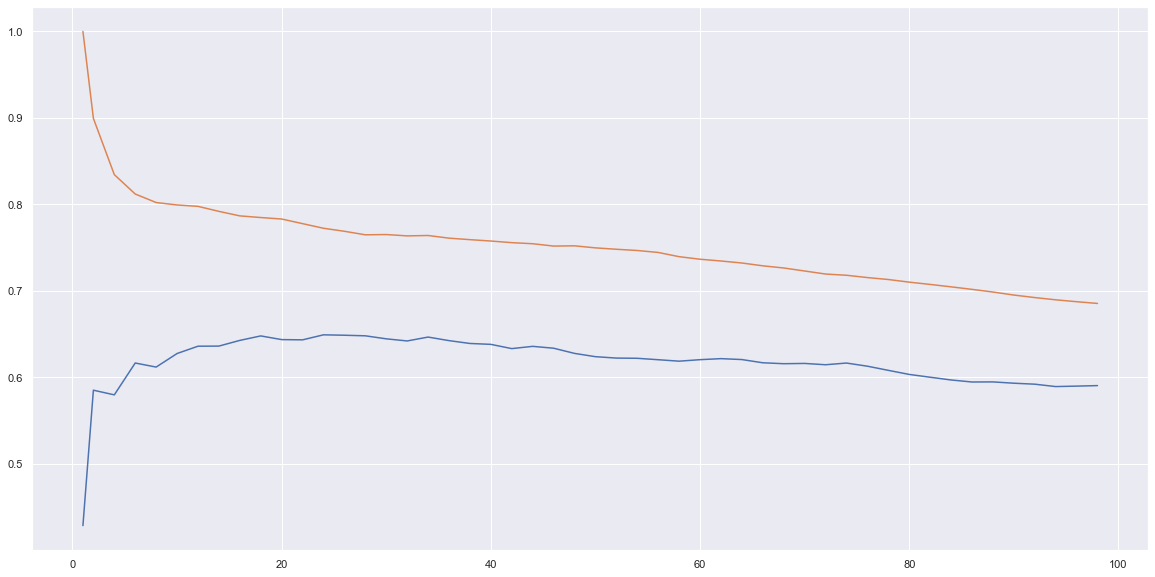

In [32]:
#曼哈顿距离
testing_scores=[]
training_scores=[]
Ks=np.linspace(1,100,endpoint=False,dtype='int')
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
for K in Ks:
        reg=KNeighborsRegressor(weights='uniform',n_neighbors=K,metric='manhattan')
        reg.fit(X_train,y_train)
        testing_scores.append(reg.score(X_test,y_test))
        training_scores.append(reg.score(X_train,y_train))

ax.plot(Ks,testing_scores,label="testing score")
ax.plot(Ks,training_scores,label="training score")
print(Ks[testing_scores.index(max(testing_scores))])

In [33]:
reg=KNeighborsRegressor(weights='uniform',n_neighbors=24,metric='manhattan')
reg.fit(X_train,y_train)
reg.score(X_train,y_train)

0.7724533681987178

In [34]:
reg.score(X_test,y_test)

0.6492667193274698

In [35]:
#基础随机森林
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9601558065517366

In [36]:
model.score(X_test,y_test)

0.6371470107401681

In [37]:
#随机森林

from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle


data_shuffled = shuffle(data, random_state = 32) 

num_of_samples = data_shuffled.shape[0]
split_line = int(num_of_samples * 0.75)
train_data = data.iloc[:split_line]
test_data = data.iloc[split_line:]

features = ['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research']
trainx = train_data[features]
trainy = train_data['Chance of Admit']
testx = test_data[features]
testy = test_data['Chance of Admit']


model = RandomForestRegressor()
model.fit(trainx,trainy)
prediction=model.predict(testx)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [38]:
model.score(trainx,trainy)

0.9549878360650856

In [39]:
model.score(testx,testy)

0.7393293716070211

In [40]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
dt = dt.fit(trainx,trainy)
rf = rf.fit(trainx,trainy)
score_dt = dt.score(testx,testy)
score_rf = rf.score(testx,testy)
print("Single Tree:{}".format(score_dt),"Random Forest:{}".format(score_rf))

Single Tree:0.5502209491646172 Random Forest:0.7418181034885853


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':np.arange(10,161,10)} 
rf= RandomForestRegressor()
GS = GridSearchCV(rf,param_grid)
GS.fit(trainx,trainy)
print(GS.best_params_)
print(GS.best_score_)

model1 = RandomForestRegressor(n_estimators=GS.best_params_['n_estimators'])
model1.fit(trainx,trainy)
prediction=model1.predict(testx)
print(model1.score(trainx,trainy))
print(model1.score(testx,testy))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'n_estimators': 140}
0.7156284470211438
0.9649234612718343
0.7636298849229153


In [42]:
#四个回归模型

In [43]:
#导入数据，为了避免前面部分操作的影响，我们再次导入原始数据
data = pd.read_csv('uni.csv')

In [44]:
#生成数据标签与特征
rate = data['Chance of Admit']
features = data.drop('Chance of Admit',axis=1)

In [45]:
#引入shuffle打乱数据集
from sklearn.utils import shuffle
features1, rate1=shuffle(features,rate)
#分割成训练集与测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(features1,rate1,random_state=0)

In [46]:
#线性回归
#引用线性回归预测模型
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
#各个特征的系数
lr.coef_

array([0.00191112, 0.00218577, 0.00275845, 0.00072532, 0.01903772,
       0.1299194 , 0.01974904])

In [48]:
#训练集的学习效果
lr.score(X_train, y_train)

0.8057590098648972

In [49]:
#测试集的学习效果
lr.score(X_test, y_test)

0.7915017738457725

In [50]:
#用线性回归模型预测某位同学的录取率
pre_data=pd.read_excel('predict.xlsx')
features=['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research']
prediction=lr.predict(pre_data[features])
print(prediction)

[0.83357732]


In [51]:
#Lasso回归
#引入Lasso回归模型，正则化参数alpha默认为1.0
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0,max_iter=1000000)
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [52]:
#训练集的学习效果
lasso.score(X_train, y_train)

0.2549281403170376

In [53]:
#测试集的学习效果
lasso.score(X_test, y_test)

0.2712598084543083

In [54]:
#查看保留的特征个数（系数为非零）：1（保留的特征个数过少）
import numpy as np
np.sum(lasso.coef_ != 0)

1

In [55]:
#寻找最佳alpha：扩大alpha试探范围 
from sklearn.linear_model import LassoCV
import numpy as np
alphalist=10**np.linspace(-4,4,100)
lassocv=LassoCV(alphas=alphalist,max_iter=1000000)
lassocv.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803587e-03, 3.43046929e-03,
       4.13201240e-03, 4.97702356e-0...
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
        copy_X=True, cv='warn', eps=0.001, fit_intercept=True, max_iter=1000000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [56]:
#最佳alpha的值
lassocv.alpha_

0.0019630406500402726

In [57]:
#查看保留的特征个数（系数为非零）：7
np.sum(lassocv.coef_ != 0)

7

In [58]:
#训练集的学习效果
lassocv.score(X_train, y_train)

0.802905090790801

In [59]:
#测试集的学习效果
lassocv.score(X_test, y_test)

0.7919334395909382

In [60]:
#寻找最佳的alpha值:第一轮改善
alist1=list(alphalist)
pos1=alist1.index(lassocv.alpha_)
alphalist1=np.linspace(alist1[pos1-1],alist1[pos1+1],100)
lassocv1=LassoCV(alphas=alphalist1)
lassocv1.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=array([0.00162975, 0.00163717, 0.00164459, 0.00165202, 0.00165944,
       0.00166686, 0.00167428, 0.0016817 , 0.00168912, 0.00169655,
       0.00170397, 0.00171139, 0.00171881, 0.00172623, 0.00173365,
       0.00174107, 0.0017485 , 0.00175592, 0.00176334, 0.00177076,
       0.00177818, 0.0017856 , 0.00179303, 0.00180045, 0.00180787,
       0.00181529, 0.00182271, 0.00183013, 0.00183756, 0.00184498,
       0...
       0.00226059, 0.00226801, 0.00227543, 0.00228285, 0.00229027,
       0.00229769, 0.00230512, 0.00231254, 0.00231996, 0.00232738,
       0.0023348 , 0.00234222, 0.00234965, 0.00235707, 0.00236449]),
        copy_X=True, cv='warn', eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [61]:
#最佳alpha
lassocv1.alpha_ 

0.00200825252633037

In [62]:
#训练集分数
lassocv1.score(X_train, y_train) 

0.802772089938549

In [63]:
#测试集分数
lassocv1.score(X_test, y_test) 

0.7918612259132429

In [64]:
#寻找最佳的alpha值：第2轮改善
alist2=list(alphalist1) 
pos2=alist2.index(lassocv1.alpha_) 
alphalist2=np.linspace(alist2[pos2-1],alist2[pos2+1],100) 
lassocv2=LassoCV(alphas=alphalist2)
lassocv2.fit(X_train, y_train) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=array([0.00200083, 0.00200098, 0.00200113, 0.00200128, 0.00200143,
       0.00200158, 0.00200173, 0.00200188, 0.00200203, 0.00200218,
       0.00200233, 0.00200248, 0.00200263, 0.00200278, 0.00200293,
       0.00200308, 0.00200323, 0.00200338, 0.00200353, 0.00200368,
       0.00200383, 0.00200398, 0.00200413, 0.00200428, 0.00200443,
       0.00200458, 0.00200473, 0.00200488, 0.00200503, 0.0020051...
       0.00201358, 0.00201373, 0.00201387, 0.00201402, 0.00201417,
       0.00201432, 0.00201447, 0.00201462, 0.00201477, 0.00201492,
       0.00201507, 0.00201522, 0.00201537, 0.00201552, 0.00201567]),
        copy_X=True, cv='warn', eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [65]:
#最佳alpha
lassocv2.alpha_ 

0.0020078776979567223

In [66]:
#训练集分数
lassocv2.score(X_train, y_train)

0.8027732050316759

In [67]:
#测试集分数
lassocv2.score(X_test, y_test) 

0.7918618398347106

In [68]:
#查看保留的特征个数（系数为非零）：7
np.sum(lassocv2.coef_ != 0)

7

In [69]:
#各个特征的系数
lassocv2.coef_

array([0.00267425, 0.00309704, 0.00394783, 0.00113454, 0.01945585,
       0.10594786, 0.00982391])

In [70]:
#用含最优参数的Lasso回归模型预测某位同学的录取率
pre_data=pd.read_excel('predict.xlsx')
features=['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research']
prediction=lassocv2.predict(pre_data[features])
print(prediction)

[0.83435929]


In [71]:
#Ridge回归
#引入Ridge回归模型，正则化参数alpha默认为1.0
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [72]:
#训练集的学习效果
ridge.score(X_train, y_train)

0.8056187737910663

In [73]:
#测试集的学习效果
ridge.score(X_test, y_test)

0.7932930878942495

In [74]:
#查看保留的特征个数（系数为非零）：7
np.sum(ridge.coef_ != 0)

7

In [75]:
#寻找最佳的alpha值：初选 
from sklearn.linear_model import RidgeCV
import numpy as np
alphalist=10**np.linspace(-3,3,100)
ridgecv=RidgeCV(alphas=alphalist)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1.41747416e-02,
       1.62975083e-02, 1.87381742e-0...
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [76]:
#最佳alpha的值
ridgecv.alpha_

0.5336699231206312

In [77]:
#训练集的学习效果
ridgecv.score(X_train, y_train)

0.8057169004909649

In [78]:
#测试集的学习效果
ridgecv.score(X_test, y_test)

0.7925500934109306

In [79]:
#寻找最佳的alpha值：第1轮改善 
alist1=list(alphalist)
pos1=alist1.index(ridgecv.alpha_)
alphalist1=np.linspace(alist1[pos1-1],alist1[pos1+1],100)
ridgecv1=RidgeCV(alphas=alphalist1)
ridgecv1.fit(X_train, y_train)

RidgeCV(alphas=array([0.46415888, 0.4656683 , 0.46717771, 0.46868712, 0.47019653,
       0.47170595, 0.47321536, 0.47472477, 0.47623418, 0.4777436 ,
       0.47925301, 0.48076242, 0.48227183, 0.48378125, 0.48529066,
       0.48680007, 0.48830948, 0.4898189 , 0.49132831, 0.49283772,
       0.49434713, 0.49585655, 0.49736596, 0.49887537, 0.50038478,
       0.5018942 , 0.50340361, 0.50491302, 0.50642244, 0.50793185,
       0....
       0.57736483, 0.57887424, 0.58038365, 0.58189306, 0.58340248,
       0.58491189, 0.5864213 , 0.58793071, 0.58944013, 0.59094954,
       0.59245895, 0.59396836, 0.59547778, 0.59698719, 0.5984966 ,
       0.60000601, 0.60151543, 0.60302484, 0.60453425, 0.60604366,
       0.60755308, 0.60906249, 0.6105719 , 0.61208131, 0.61359073]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [80]:
#最佳的alpha值
ridgecv1.alpha_

0.5471765744613001

In [81]:
#训练集的学习效果
ridgecv1.score(X_train, y_train)

0.8057148107076946

In [82]:
#测试集的学习效果
ridgecv1.score(X_test, y_test)

0.7925737594879512

In [83]:
#寻找最佳的alpha值：第2轮改善 
alist2=list(alphalist1)
pos2=alist2.index(ridgecv1.alpha_)
alphalist2=np.linspace(alist2[pos2-1],alist2[pos2+1],100)
ridgecv2=RidgeCV(alphas=alphalist2)
ridgecv2.fit(X_train, y_train)

RidgeCV(alphas=array([0.54566716, 0.54569766, 0.54572815, 0.54575864, 0.54578913,
       0.54581963, 0.54585012, 0.54588061, 0.54591111, 0.5459416 ,
       0.54597209, 0.54600259, 0.54603308, 0.54606357, 0.54609407,
       0.54612456, 0.54615505, 0.54618555, 0.54621604, 0.54624653,
       0.54627703, 0.54630752, 0.54633801, 0.54636851, 0.546399  ,
       0.54642949, 0.54645998, 0.54649048, 0.54652097, 0.54655146,
       0...
       0.54795415, 0.54798464, 0.54801514, 0.54804563, 0.54807612,
       0.54810662, 0.54813711, 0.5481676 , 0.5481981 , 0.54822859,
       0.54825908, 0.54828958, 0.54832007, 0.54835056, 0.54838106,
       0.54841155, 0.54844204, 0.54847253, 0.54850303, 0.54853352,
       0.54856401, 0.54859451, 0.548625  , 0.54865549, 0.54868599]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [84]:
#最佳alpha值
ridgecv2.alpha_

0.5465819573900603

In [85]:
#训练集的学习效果
ridgecv2.score(X_train, y_train)

0.8057149037043079

In [86]:
#测试集的学习效果
ridgecv2.score(X_test, y_test)

0.7925727204283479

In [87]:
#查看保留的特征个数（系数为非零）：7
np.sum(ridgecv2.coef_ != 0)

7

In [88]:
#各个特征的系数
ridgecv2.coef_

array([0.00197963, 0.00230894, 0.00316178, 0.00095888, 0.01933718,
       0.12596798, 0.01966826])

In [89]:
#用含最优参数的ridge回归模型预测某位同学的录取率
pre_data=pd.read_excel('predict.xlsx')
features=['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research']
prediction=ridgecv2.predict(pre_data[features])
print(prediction)

[0.83296221]


In [90]:
#ElasticNet回归
#引入ElasticNet回归模型，默认alpha为1.0，l1_ratio=0.5
from sklearn.linear_model import ElasticNet
ENet=ElasticNet(alpha=1.0,l1_ratio=0.5,max_iter=1000000)
ENet.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [91]:
#训练集的学习效果
ENet.score(X_train, y_train)

0.5443293108393623

In [92]:
#测试集的学习效果
ENet.score(X_test, y_test)

0.5676011937815943

In [93]:
#查看保留的特征个数（系数为非零）：7
np.sum(ENet.coef_ != 0)

1

In [94]:
#更换参数alpha=0.01，l1_ratio=0.1
from sklearn.linear_model import ElasticNet
ENet=ElasticNet(alpha=0.01,l1_ratio=0.1, max_iter=10000)
ENet.fit(X_train, y_train)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.1,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [95]:
#训练集的学习效果
ENet.score(X_train, y_train)

0.8031825827327135

In [96]:
#测试集的学习效果
ENet.score(X_test, y_test)

0.7940465408690784

In [97]:
#寻找最佳alpha
from sklearn.linear_model import ElasticNetCV
import numpy as np
alphalist=10**np.linspace(-3,3,100)
l1list=np.linspace(0.01,1.0,100)
ENet=ElasticNetCV(alphas=alphalist,l1_ratio=l1list,max_iter=100000)
ENet.fit(X_train, y_train)
ENet.alpha_, ENet.l1_ratio_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(0.002009233002565048, 1.0)

In [98]:
#训练集的学习效果
ENet.score(X_train, y_train) 

0.8027691720928968

In [99]:
#测试集的学习效果
ENet.score(X_test, y_test)

0.7918596188125651

In [100]:
#查看保留的特征个数（系数为非零）：7
np.sum(ENet.coef_ != 0)

7

In [101]:
ENet.coef_

array([0.00267477, 0.00309765, 0.00394863, 0.00113482, 0.01945614,
       0.10593167, 0.00981721])

In [102]:
#用含最优参数的ElasticNet回归模型预测某位同学的录取率
pre_data=pd.read_excel('predict.xlsx')
features=['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research']
prediction=ENet.predict(pre_data[features])
print(prediction)

[0.83435982]
